Importing Libraries & Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data = pd.read_csv('tcc_ceds_music.csv')
data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


Exploratory Data Analysis

In [4]:
data.shape

(28372, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

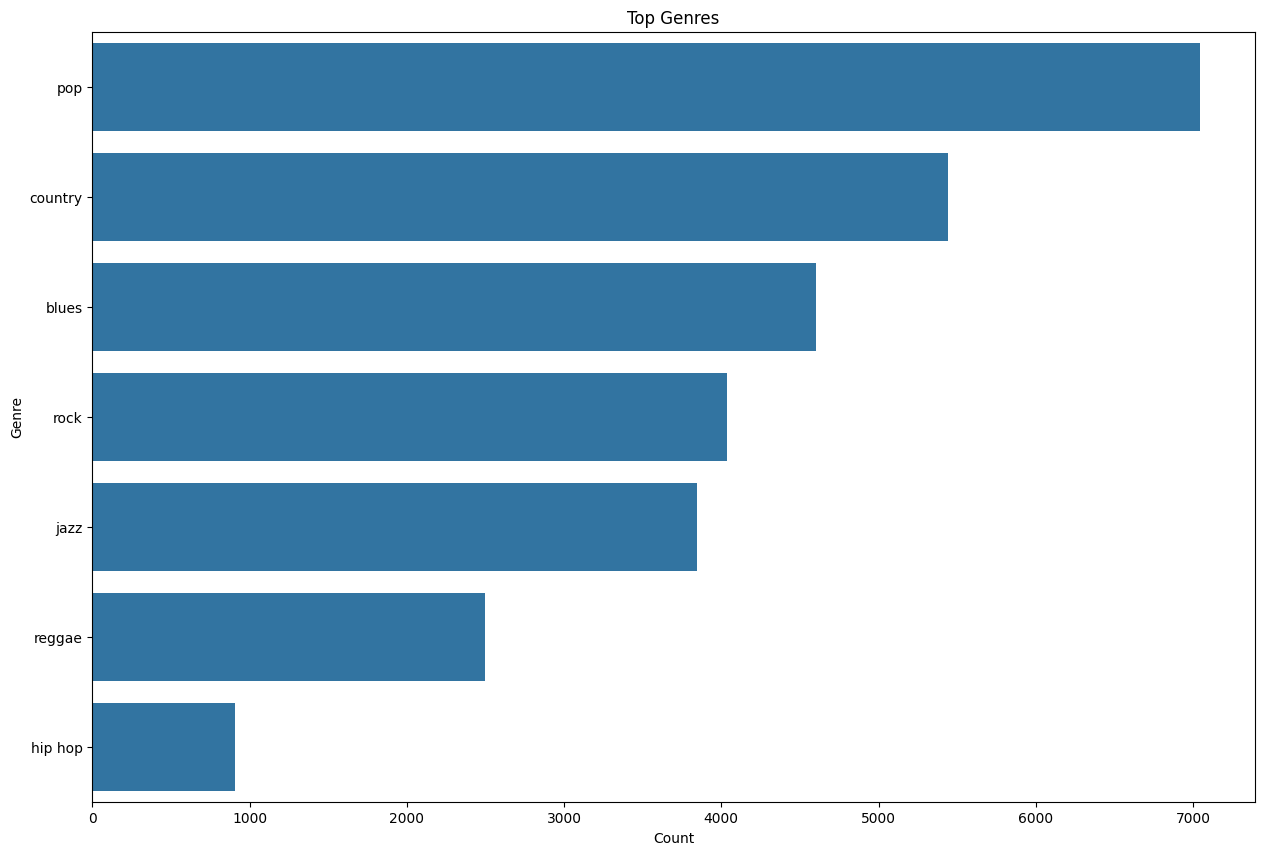

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:])
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

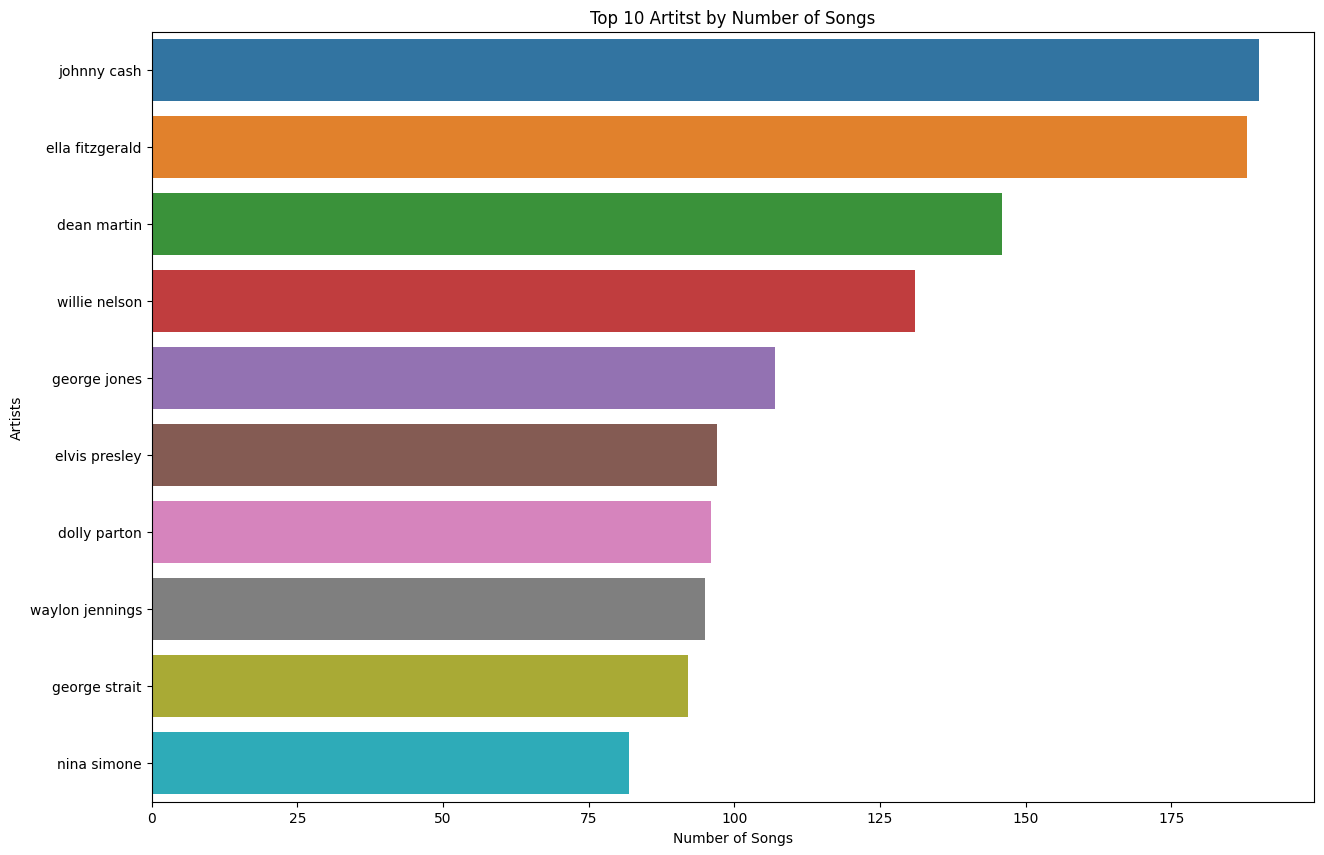

In [7]:
top_artists=data.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index)
plt.title('Top 10 Artitst by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.show()

Preprocessing the Data

In [8]:
data['combined_features']=(data['genre'].fillna('')+ " "+data['artist_name'].fillna('')+ " "+data['track_name'].fillna(''))

In [9]:
data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,combined_features
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,pop mukesh mohabbat bhi jhoothi
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,pop frankie laine i believe
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,pop johnnie ray cry
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,pop pérez prado patricia
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,pop giorgos papadopoulos apopse eida oneiro


In [10]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(data['combined_features'])

In [11]:
cosine_sim=cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(song_title, data, cosine_sim, top_n=10):
    idx=data[data['track_name']==song_title].index
    if len(idx)==0:
        print('Song not found in the dataset.')
        return

    idx=idx[0]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores[1:top_n+1]
    song_indices=[i[0] for i in sim_scores]

    recommendations=data.iloc[song_indices]
    return recommendations

Generate Recommendations

In [16]:
recommended_songs=get_recommendations('cry', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                          track_name     artist_name  genre
56                         here am i     johnnie ray    pop
12887             keep on loving you  johnnie taylor  blues
15294              too many memories  johnnie taylor  blues
14542  there's nothing i wouldn't do  johnnie taylor  blues
14679                         lately  johnnie taylor  blues
13887                     steal away  johnnie taylor  blues
14701             don't make me late  johnnie taylor  blues
12881           baby, we've got love  johnnie taylor  blues
13247  i got to love somebody's baby  johnnie taylor  blues
12882            i need lots of love  johnnie taylor  blues


Visual Recommendations

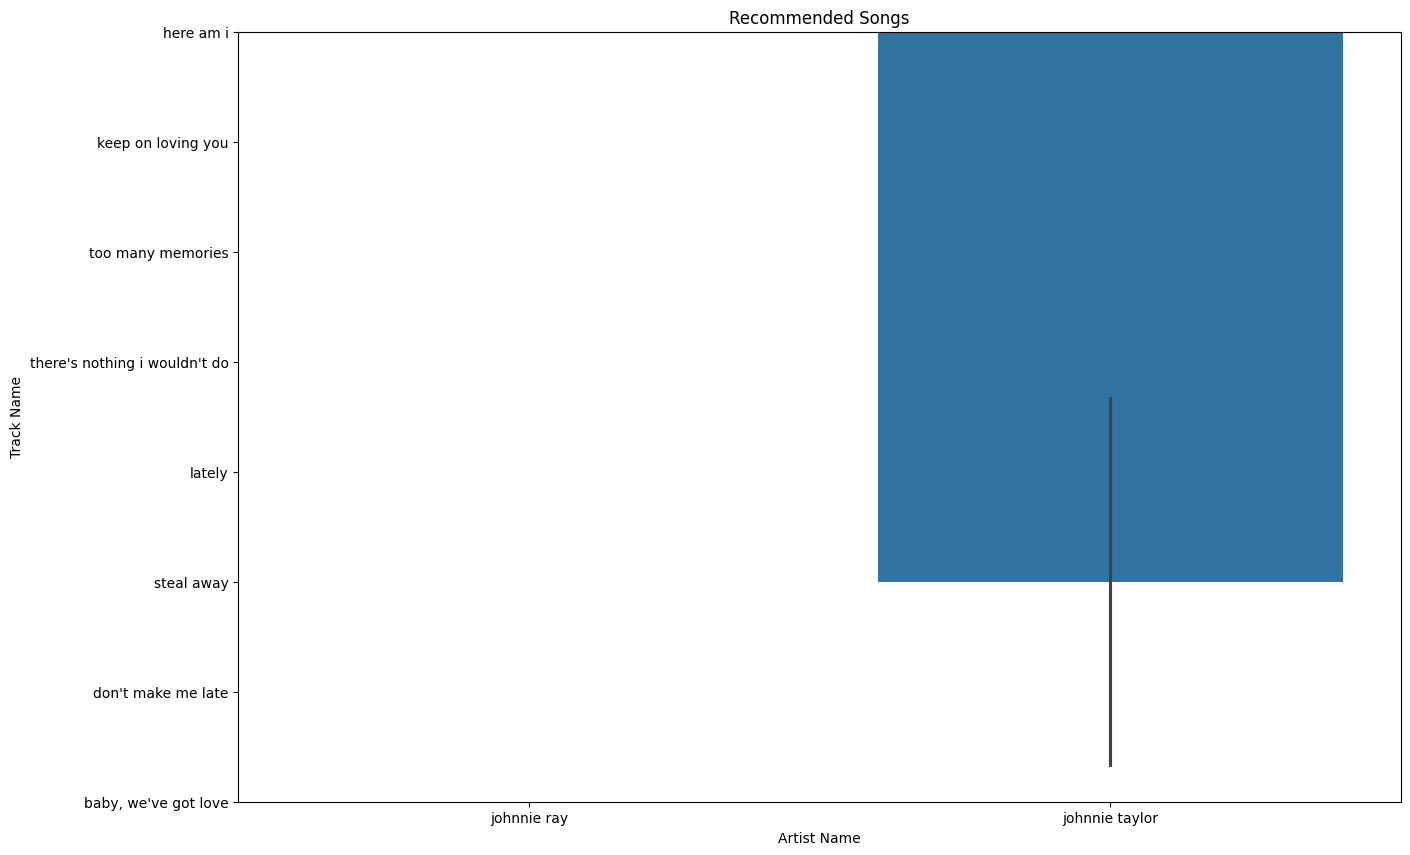

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(y=recommended_songs['track_name'], x=recommended_songs['artist_name'])
plt.title('Recommended Songs')
plt.xlabel('Artist Name')
plt.ylabel('Track Name')
plt.show()